In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, Model
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import BatchNormalization, Dropout

Using TensorFlow backend.


# 1. dataset

## 1.1. train data

In [10]:
base_path =os.path.join(os.getcwd(), './hard_handwriting_shape/train').replace('\\','/')
base_path

'C:/AI/OpenCV/CNN/./hard_handwriting_shape/train'

In [11]:
label_list = os.listdir(base_path)[1:]
label_list

['circle', 'rectangle', 'triangle']

In [12]:
path_list1 = os.listdir(os.path.join(base_path, label_list[0]))[1:]
path_list2 = os.listdir(os.path.join(base_path, label_list[1]))[1:]
path_list3 = os.listdir(os.path.join(base_path, label_list[2]))[1:]

path_list = [path_list1,path_list2,path_list3]
path_list3[:3]

['triangle001.png', 'triangle002.png', 'triangle003.png']

In [13]:
y_train = []
X_train = np.zeros([24,24,1])
X_train.shape

(24, 24, 1)

In [14]:
y_train = []
X_train = []

for label, path in zip(label_list, path_list):
    for file in path:
        # y라벨
        y_train.append(file[:-7])
        
        # X img
        img_path = os.path.join(os.path.join(base_path, label),file)
#         img_path = str(img_path).replace('\','/')
#         print(img_path)
        img = cv2.imread(img_path,0 ).reshape(24,24,1)
#         print(img.shape)
#         np.stack((X_train, img), axis = 0)
        X_train.append(img)

In [15]:
X_train = np.asarray(X_train)
X_train.shape

(45, 24, 24, 1)

In [16]:
y_train = np.asarray(y_train)
y_train

array(['circle', 'circle', 'circle', 'circle', 'circle', 'circle',
       'circle', 'circle', 'circle', 'circle', 'circle', 'circle',
       'circle', 'circle', 'circle', 'rectangle', 'rectangle',
       'rectangle', 'rectangle', 'rectangle', 'rectangle', 'rectangle',
       'rectangle', 'rectangle', 'rectangle', 'rectangle', 'rectangle',
       'rectangle', 'rectangle', 'rectangle', 'triangle', 'triangle',
       'triangle', 'triangle', 'triangle', 'triangle', 'triangle',
       'triangle', 'triangle', 'triangle', 'triangle', 'triangle',
       'triangle', 'triangle', 'triangle'], dtype='<U9')

In [17]:
# sklearn LabelEncoder
le  = LabelEncoder()
le.fit(y_train.tolist())
y_label=le.transform(y_train.tolist())

In [18]:

y_label = to_categorical(y_label)
y_label.shape

(45, 3)

## 1.2.test data

In [25]:
base_path =os.path.join(os.getcwd(), './hard_handwriting_shape/test').replace('\\','/')
base_path

'C:/AI/OpenCV/CNN/./hard_handwriting_shape/test'

In [26]:
label_list = os.listdir(base_path)[1:]
label_list

['circle', 'rectangle', 'triangle']

In [27]:
path_list1 = os.listdir(os.path.join(base_path, label_list[0]))[1:]
path_list2 = os.listdir(os.path.join(base_path, label_list[1]))[1:]
path_list3 = os.listdir(os.path.join(base_path, label_list[2]))[1:]

path_list = [path_list1,path_list2,path_list3]
path_list3[:3]

['triangle021.png', 'triangle022.png', 'triangle023.png']

In [28]:
y_test = []
X_test = []

for label, path in zip(label_list, path_list):
    for file in path:
        # y라벨
        y_test.append(file[:-7])
        
        # X img
        img_path = os.path.join(os.path.join(base_path, label),file)
#         img_path = str(img_path).replace('\','/')
#         print(img_path)
        img = cv2.imread(img_path,0 ).reshape(24,24,1)
#         print(img.shape)
#         np.stack((X_train, img), axis = 0)
        X_test.append(img)

In [29]:
X_test = np.asarray(X_test)
X_test.shape

(15, 24, 24, 1)

In [30]:
y_test = np.asarray(y_test)
y_test

array(['circle', 'circle', 'circle', 'circle', 'circle', 'rectangle',
       'rectangle', 'rectangle', 'rectangle', 'rectangle', 'triangle',
       'triangle', 'triangle', 'triangle', 'triangle'], dtype='<U9')

In [31]:
y_test2 = []
for i in y_test:
    if i == 'circle':
        y_test2.append('0')
    elif i == 'rectangle':
        y_test2.append('1')
    else:
         y_test2.append('2')


In [32]:
y_test2 = to_categorical(y_test2)
y_test2.shape

(15, 3)

# 2. CNN 만들기

In [33]:
X_data = X_train
y_data = y_label
X_data.shape, y_data.shape

((45, 24, 24, 1), (45, 3))

In [34]:
model = Sequential()

model.add(Conv2D(input_shape = (X_data.shape[1], X_data.shape[2], X_data.shape[3]), 
                 filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), padding = 'valid'))
model.add(BatchNormalization())
# param: 이동, scale한 후, 나중에 다시 복원할 때 필요한 파라미터들이 저장되어 있음.
# 학습하는 파라미터는 아님. 보관하는 파라미터들
model.add(Activation('relu'))

model.add(Conv2D(filters = 128, kernel_size = (3,3), strides = (1,1), padding = 'valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size = (2,2)))

# model.add(GlobalAveragePooling2D())

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(3, activation = 'softmax'))

adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 22, 22, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 22, 22, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 20, 20, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 20, 20, 64)        0         
______________________________________

Train on 36 samples, validate on 9 samples
Epoch 1/100
36/36 [==============================] - 0s 3ms/step - loss: 0.0111 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/100
36/36 [==============================] - 0s 3ms/step - loss: 0.0165 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/100
36/36 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/100
36/36 [==============================] - 0s 3ms/step - loss: 0.1814 - accuracy: 0.9722 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/100
36/36 [==============================] - 0s 3ms/step - loss: 0.1206 - accuracy: 0.9444 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/100
36/36 [==============================] - 0s 3ms/step - loss: 0.0727 - accuracy: 0.9722 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/100
36/36 [==============================] - 0s 3ms/step - loss: 0.0253 - accur

36/36 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 57/100
36/36 [==============================] - 0s 3ms/step - loss: 1.0000e-04 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 58/100
36/36 [==============================] - 0s 3ms/step - loss: 0.0848 - accuracy: 0.9444 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 59/100
36/36 [==============================] - 0s 3ms/step - loss: 9.1246e-06 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 60/100
36/36 [==============================] - 0s 3ms/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 61/100
36/36 [==============================] - 0s 3ms/step - loss: 0.0200 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 62/100
36/36 [==============================] - 0s 3ms/step - loss: 4.6568e-05 - accuracy: 1.0000 - val_loss: 0.0000e+00 - 

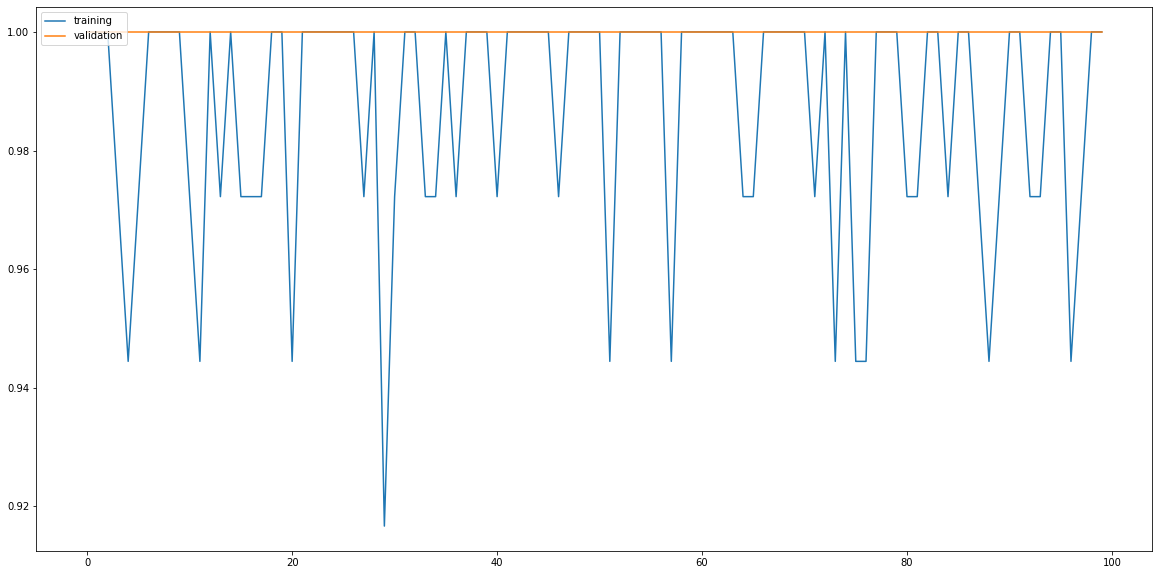

In [36]:
history = model.fit(X_train, y_label, batch_size = 15, validation_split = 0.2, epochs = 100, verbose = 1)
plt.figure(figsize=(20,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

# 3. test accuracy확인

In [98]:
results = model.evaluate(X_test, y_test2)
print('Test accuracy: ', results[1])

#단순 cnn조차 금방 96% 나온다.

15/15 [==============================] - 0s 931us/step
Test accuracy:  0.46666666865348816


# 4. 해석
- test_easy는 잘 맞추지만
- test는 잘 맞추기 못함

> train, test data간의 특징이 많이 다르기 때문에
- test data를 기하학적 변환을 해서 train data에 맞추면 가능하지만..
- 학습할 때 train data의 왜곡을 통해 해결을 해보자...

## 신경망에서 wieht값을 확인하는 것
- W = 0.7, b = 3이라면
- y = wx + b를 추론해 볼 수 있음.
- wight가 1개이므로 의미가 큼

#### CNN에서는
- 하나의 wight를 보는 것은 의미가 없음
- 필터 전제의 wight를 봐야 어떤 edge를 검출하는 것인지 알 수 있음

## 4.1.layer에 대한 정보 확인

In [105]:
for layer in model.layers:
    print(layer.name)

conv2d_25
batch_normalization_23
activation_35
conv2d_26
batch_normalization_24
activation_36
conv2d_27
batch_normalization_25
activation_37
max_pooling2d_12
global_average_pooling2d_3
dense_25
activation_38
dropout_8
dense_26
activation_39
dropout_9
dense_27


In [108]:
w = model.layers[0].get_weights()
w[0].shape,w[1].shape 
# filter의 weight / bias

((3, 3, 1, 32), (32,))

#### 첫번재 필터 보기

In [127]:
w[0][:,:,0,0]

array([[ 0.00862324, -0.06660921,  0.09023502],
       [-0.01051311,  0.00792125,  0.00173646],
       [ 0.00275464, -0.00088458,  0.06647646]], dtype=float32)

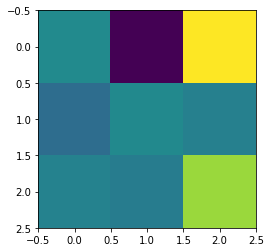

In [126]:
plt.imshow(w[0][:,:,0,0])

## 4.2. trainble 설정

In [128]:
for layer in model.layers:
    print(layer.trainable)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


## 4.3. 중간 output 확인하기

> 텐서 플로구
- weight는 메모리에 값고 있기 때문에 확인할 수 있지만,
- 텐서는 흘러가는 값이므로 확인 할 수 없음.
- 데이터가 들어가야 확일할 수 있음.

#### outout 결과

In [144]:
conv_output = model.layers[0].output
conv_output[0][0]

<tf.Tensor 'strided_slice_4:0' shape=(22, 32) dtype=float32>

In [145]:
X_train.shape

(45, 24, 24, 1)

In [146]:
#test_x를 넣었을 때 출력 이미지 확인하기
h, w = 2,2

num_classes = 3

# 모델은 이미 만들어져있기 때문에 레이어, 텐서들이 모두 존재함
# -텐서만 가져와서 사용하면 됨.
conv_model = Model(model.input, conv_output)   
conv_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25_input (InputLayer) (None, 24, 24, 1)         0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 22, 22, 32)        320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [149]:
conv_pred = conv_model.predict(X_test)

print(conv_pred.shape)

(15, 22, 22, 32)


- x_text 이미지 확인

In [154]:
X_test.shape

(15, 24, 24, 1)

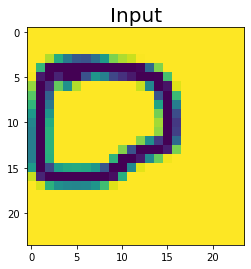

In [155]:
sample_index = 1
plt.title('Input', {'fontsize': 20})
plt.imshow(X_test[sample_index,:,:,0])

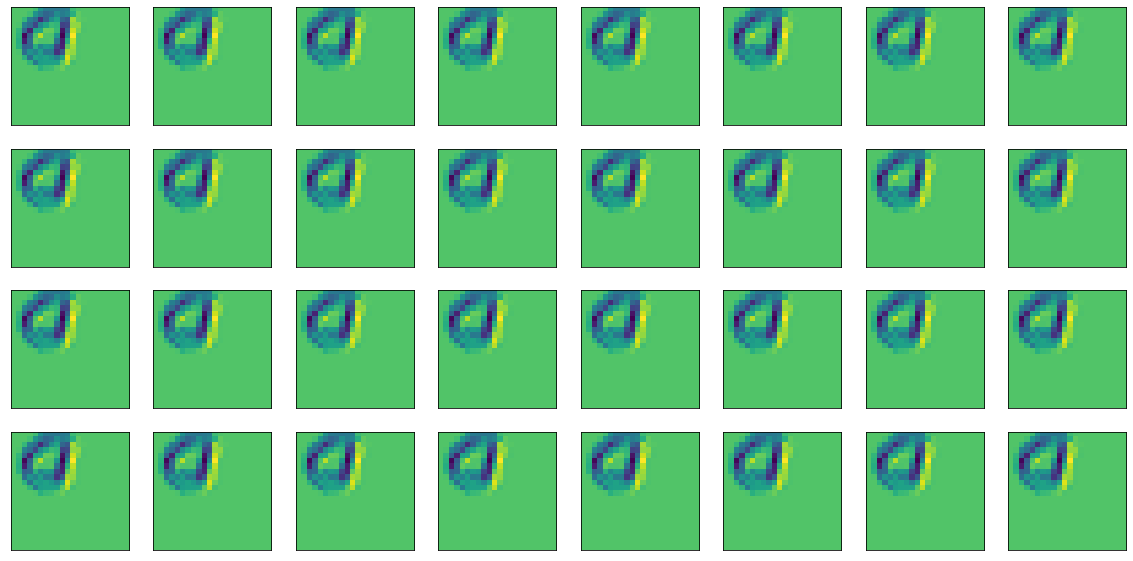

In [158]:
plt.figure(figsize = (20,10))  # 전체 (가로, 세로)
for i in range(0, 32):
    plt.subplot(4,8,i + 1)  # 세로, 가로
    plt.xticks([])
    plt.yticks([])
    plt.imshow(conv_pred[sample_index][:,:,0])

# 5. predict (= Forward)

- 예측이라는 의미보다는
- output을 내달라는 의미...

In [162]:
my_layer_model = Model(inputs = model.input,
                      outputs = model.layers[0].output)

output = my_layer_model.predict(X_test)

In [163]:
output.shape

(15, 22, 22, 32)

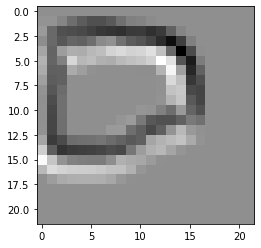

In [166]:
plt.imshow(output[0,:,:,1], cmap = 'gray')

# 6.  첫번재 conv layer 통화 후 결과 비교

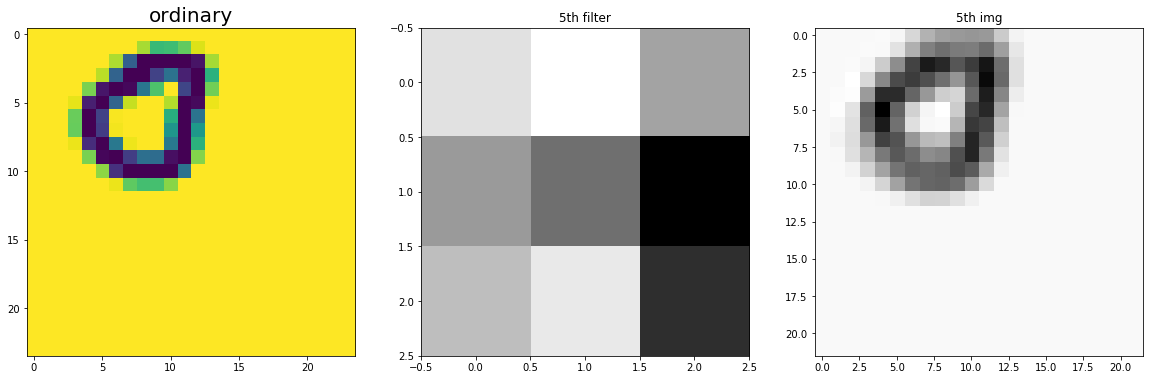

In [180]:
sample_index = 1
filter_index = 5

plt.figure(figsize = (20,10))
# 원본이미지
plt.subplot(1, 3, 1)
plt.title('ordinary', {'fontsize': 20})
plt.imshow(X_test[sample_index,:,:,0])

# filter
plt.subplot(1, 3, 2)
w = model.layers[0].get_weights()
w[0].shape,w[1].shape 
plt.title(str(filter_index) + 'th filter')
plt.imshow(w[0][:,:,0,filter_index], cmap = 'gray')

# output
plt.subplot(1, 3, 3)

my_layer_model = Model(inputs = model.input,
                      outputs = model.layers[0].output)
output = my_layer_model.predict(X_test)
plt.title(str(filter_index) + 'th img')
plt.imshow(output[sample_index,:,:,filter_index], cmap = 'gray')



# 7. flatten layer 이후 결과 비교하기

In [185]:
for i,layer in enumerate(model.layers):
    print(i,layer.name)

0 conv2d_25
1 batch_normalization_23
2 activation_35
3 conv2d_26
4 batch_normalization_24
5 activation_36
6 conv2d_27
7 batch_normalization_25
8 activation_37
9 max_pooling2d_12
10 global_average_pooling2d_3
11 dense_25
12 activation_38
13 dropout_8
14 dense_26
15 activation_39
16 dropout_9
17 dense_27


In [197]:
input_layer = model.input
output_layer = model.get_layer('flatten_11')


In [198]:
my_model1 = Model(input= model.input,
                 output = output_layer.output)

C:\anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=Tensor("fl...)`
  


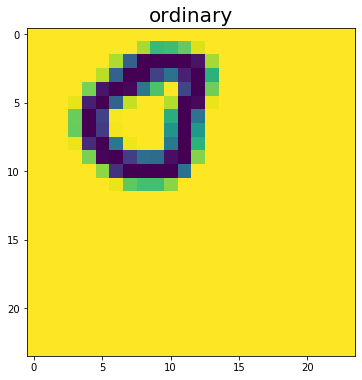

In [190]:
sample_index = 1
filter_index = 5

plt.figure(figsize = (20,10))
# 원본이미지
plt.subplot(1, 3, 1)
plt.title('ordinary', {'fontsize': 20})
plt.imshow(X_test[sample_index,:,:,0])

In [208]:
# filter
w = output_layer.get_weights()
w
# pooling 계층 이후 flatten에는 학습된 weight가 없음.

[]

In [207]:
# output
my_model = Model(input= model.input,
                 output = output_layer.output)
output = my_model.predict(X_test)
output.shape

C:\anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=Tensor("fl...)`
  This is separate from the ipykernel package so we can avoid doing imports until


(15, 10368)

# 8. 마지막 레이어 결과 살펴보기

In [210]:
output_layer = model.layers[-1]


In [211]:
my_model1 = Model(input= model.input,
                 output = output_layer.output)

C:\anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=Tensor("de...)`
  


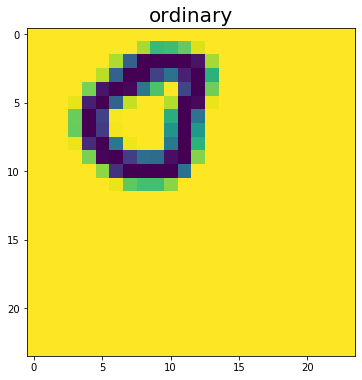

In [212]:
sample_index = 1
filter_index = 5

plt.figure(figsize = (20,10))
# 원본이미지
plt.subplot(1, 3, 1)
plt.title('ordinary', {'fontsize': 20})
plt.imshow(X_test[sample_index,:,:,0])

In [213]:
# filter
w = output_layer.get_weights()
w
# pooling 계층 이후 flatten에는 학습된 weight가 없음.

[array([[ 0.01480496,  0.00375401,  0.15171935],
        [-0.13075458,  0.06197796, -0.14354941],
        [-0.22987776, -0.236557  ,  0.20855376],
        [-0.1671234 , -0.19189252, -0.24935842],
        [ 0.1971026 , -0.21170837, -0.26347998],
        [ 0.14580157,  0.0846739 , -0.20749015],
        [ 0.17379706,  0.21699727, -0.02261828],
        [ 0.06959599, -0.11884285,  0.23008612],
        [-0.1995776 , -0.28456458,  0.01335646],
        [ 0.06313231, -0.05680187,  0.00821571],
        [ 0.23010872,  0.15702312,  0.03722711],
        [-0.23430136,  0.25909686, -0.13467099],
        [ 0.1781769 ,  0.20912388, -0.08271135],
        [-0.13514248, -0.20491233, -0.176246  ],
        [ 0.24174827,  0.07947146, -0.03750838],
        [ 0.18344754,  0.02716687,  0.12324654],
        [ 0.10911599,  0.03620576, -0.03792284],
        [-0.01696741,  0.06331728, -0.12950194],
        [-0.17142734,  0.1110775 , -0.23113519],
        [ 0.23103641,  0.15451236,  0.17728601],
        [ 0.01853879

In [214]:
# output
my_model = Model(input= model.input,
                 output = output_layer.output)
output = my_model.predict(X_test)
output.shape

C:\anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=Tensor("de...)`
  This is separate from the ipykernel package so we can avoid doing imports until


(15, 3)

In [229]:
Pred = np.argmax(output, axis = 1)
T = np.argmax(y_test2, axis = 1)

print('맞은 것 :', ( Pred == T)*1)
print('몇 개 맞췄니:', sum(Pred == T) * 1)
print('정확도:', sum(Pred == T) * 1 / len(Pred))

맞은 것 : [0 1 0 0 0 0 0 0 0 0 1 1 1 1 1]
몇 개 맞췄니: 6
정확도: 0.4


In [233]:
sample_index = 1

pred = np.argmax(output[sample_index,:])
true = np.argmax(y_test2[sample_index])
print(pred, true)

0 0


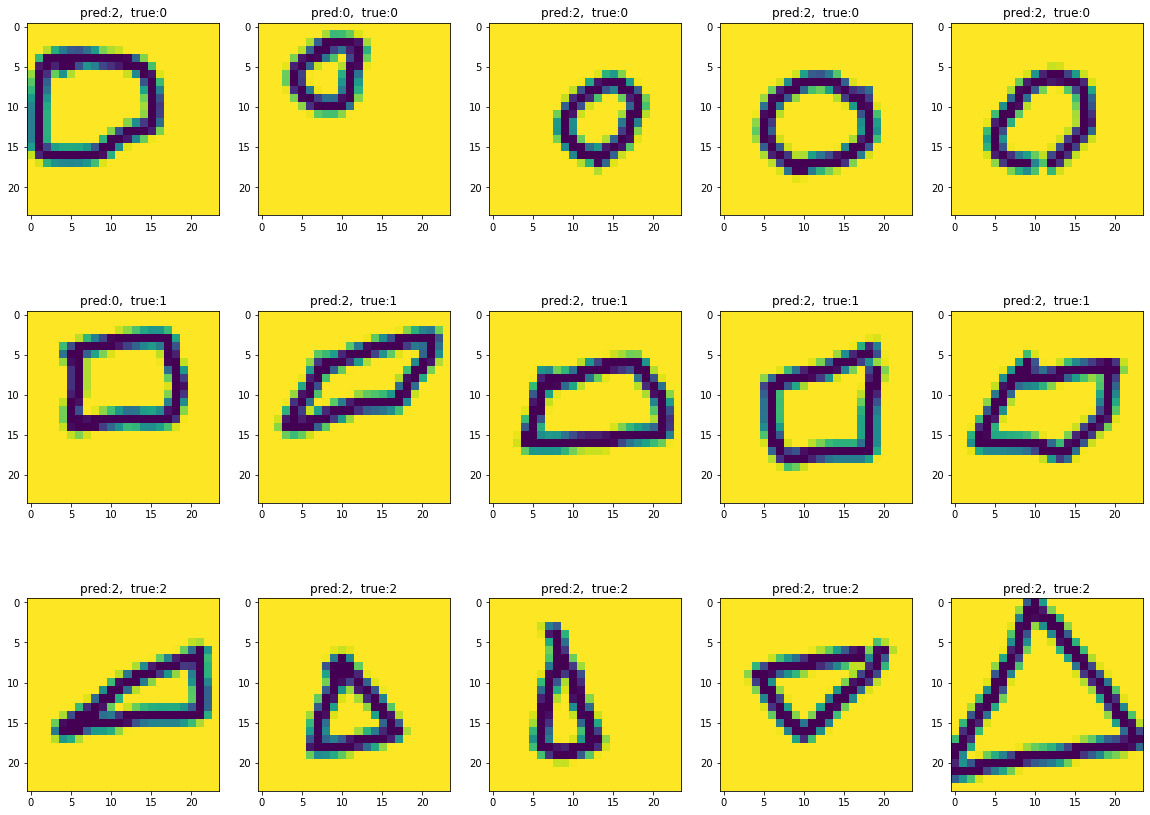

In [240]:
plt.figure(figsize = (20,15))
for i in range(len(y_test2)):
    plt.subplot(3, 5, i + 1)
    pred = np.argmax(output[i,:])
    true = np.argmax(y_test2[i])
    plt.title('pred:'+str(pred)+ ',  true:'+str(true))
    plt.imshow(X_test[i,:,:,0])

# 시그마(wx + b)
- x가 크면 값이 발산하는 문제를 없애기 위해서

> 해결방안
- 1. w값을 줄이기 위해서 초기화 값을 아주 작게 하지
- 2. x를 값을 줄이고(scaling: 값을 나누기) -> batch normalization
